In [1]:
import ApylabradosModule as ap
import util as util

In [2]:
#Creando bolsa
bag_of_pawns = ap.Pawn()
bag_of_pawns.createBag()

In [3]:
#Creando fichas de jugador
player_pawns = ap.Pawn()
for i in range(7):
    player_pawns.addPawn(bag_of_pawns.takeRandomPawn())

In [4]:
#Creando Tablero
tablero = ap.Board()
tablero.setUpMultiplier()

In [5]:
#Creando Diccionario
diccionario = ap.Dictionary()

In [6]:
#Dando Bienvenida y mostrando Instrucciones
util.Welcome()
util.Instruction()

Bienvido a Apylabrado!!
Las instrucciones para jugar son:
1-Introduce las Palabras en MAYUSCULAS
2-La primera palabra debe pasar por la casilla central
3-Salvo la primera palabra, todas deben ocupar como minimo una ficha ya existente en el tablero
4-Solo hay dos direcciones para colores las fichas: Vertical(V) y Horizontal(H)
5-Puedes Poner LEGENDHELP para ver las leyendas del Tablero.


In [7]:
#Dummy para salir del juego
dummy = True

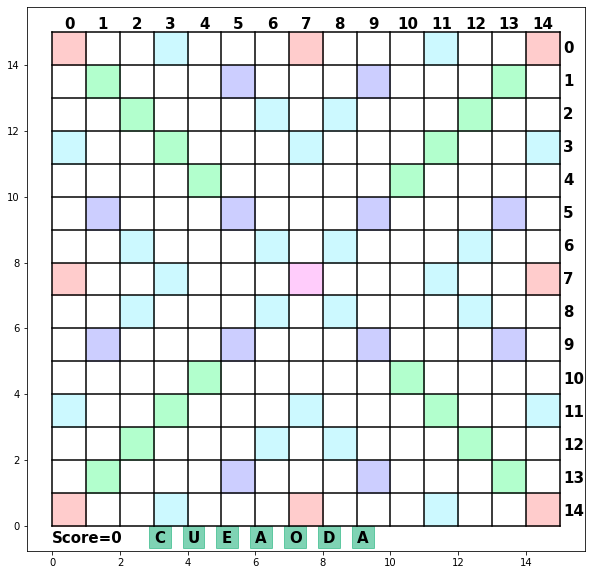

1-Introducir Palabra
2-Pedir Ayuda
3-Ver estadisticas
4-Salir del Juego
Opcion:1
Ingrese una palabra:LEGENDHELP


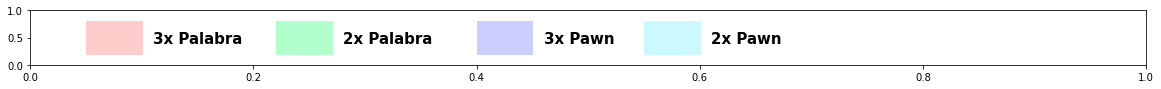

Gracias por jugar
Puntos conseguidos:0
Fichas Puestas:0
Palabras Puestas:0


In [8]:
tablero.showBoard(player_pawns,bag_of_pawns)
while dummy and player_pawns.letter != []:
    opcion = int(input("1-Introducir Palabra\n2-Pedir Ayuda\n3-Ver estadisticas\n4-Salir del Juego\nOpcion:"))
    #Jugar introduciendo Palabra
    if opcion == 1:
        word = ap.Word.readWord(input("Ingrese una palabra:"))
        if word.__str__() == "LEGENDHELP":
            util.legend()
            continue
        x =  int(input("Ingrese n° fila:"))
        y =  int(input("Ingrese n° columna:"))
        direccion = input("Ingrese direccion:")
        tabla_jugador = player_pawns.getFrequency()
        palabra_a_poner = tablero.getPawns(word,x,y,direccion)
        tabla_palabra = palabra_a_poner.getFrequency()
        if (not palabra_a_poner.isEmpty()) and (ap.FrequencyTable.isSubset(tabla_palabra,tabla_jugador)):
            tablero.placeWord(player_pawns,word,x,y,direccion)
        else:
            print(tablero.isPossible(word,x,y,direccion)[1])
        tablero.showBoard(player_pawns,bag_of_pawns)
    #Ayuda
    elif opcion == 2:
        opcion = int(input("1-Ver Palabras que se puede formar\n2-Ver palabras que se pueden formar con cierta Letra\n3-Ver en que posicion se puede poner cierta Palabra\nOpcion:"))
        #Ver Posibles Palabras
        if opcion == 1:
            print("----+"*5)
            diccionario.showWord(player_pawns)
            print("----+"*5)
        #Ver Posibles palabras con char c
        elif opcion == 2:
            print("----+"*5)
            diccionario.showWordPlus(player_pawns,input("Ingrese una letra:"))
            print("----+"*5)
        #Ver Posibles lugares dada una palabra
        elif opcion == 3:
            print("----+"*5)
            tablero.showWordPlacement(player_pawns,ap.Word.readWord(input("Ingrese una Palabra:")))
            print("----+"*5)
        #Opcion no valida
        else:
            print("Opcion no Valida")
    #Estadisticas
    elif opcion == 3:
        opcion = int(input("1-Ver Fichas\n2-Puntos de cada ficha\n3-Ver Tablero\nOpcion:"))
        #Ver fichas
        if opcion == 1:
            print("----+"*5)
            player_pawns.showPawn()
            print("----+"*5)
        #Ver puntos de las fichas
        elif opcion == 2:
            print("----+"*5)
            ap.Pawn.showPawnPoints()
            print("----+"*5)
        #Ver Tablero
        elif opcion == 3:
            tablero.showBoard(player_pawns,bag_of_pawns)
        #Opcion no valida
        else:
            print("Opcion no valida")
    #Terminar Juego
    elif opcion == 4:
        dummy = False
    #Opcion no valida
    else:
        print("Opcion no Valida")

print("Gracias por jugar")
print("Puntos conseguidos:{}".format(tablero.score))
print("Fichas Puestas:{}".format(tablero.totalPawn))
print("Palabras Puestas:{}".format(tablero.totalWords))